In [1]:
from sympy import *
init_printing()
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt 
from matplotlib import cm
from mpl_toolkits import mplot3d
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

from mpl_toolkits.mplot3d.axes3d import get_test_data 
from mpl_toolkits.mplot3d import Axes3D 

#we will need this in order to paint vectors
class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [2]:
# sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j] # u = phi, v = theta
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)

# fixed theta plane
rt, ut = np.mgrid[0:1:50j, 0:2*np.pi:50j] # u = phi 
vt = np.pi/3
xt = rt*np.cos(ut)*np.sin(vt) 
yt = rt*np.sin(ut)*np.sin(vt)
zt = rt*np.cos(vt)
ut1, vt1 = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j] #fixed r and theta 
vt1 = 0*vt1 + np.pi/3
xt1 = np.cos(ut1)*np.sin(vt1)  
yt1 = np.sin(ut1)*np.sin(vt1)
zt1 = np.cos(vt1)

# fixed phi plane
rp, vp = np.mgrid[0:1:50j, 0:np.pi:50j]  
up = np.pi/2
xp = rp*np.cos(up)*np.sin(vp) 
yp = rp*np.sin(up)*np.sin(vp)
zp = rp*np.cos(vp)
up1, vp1 = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j] # fixed r and phi 
up1 = 0*up1 + np.pi/2
xp1 = np.cos(up1)*np.sin(vp1)  
yp1 = np.sin(up1)*np.sin(vp1)
zp1 = np.cos(vp1)

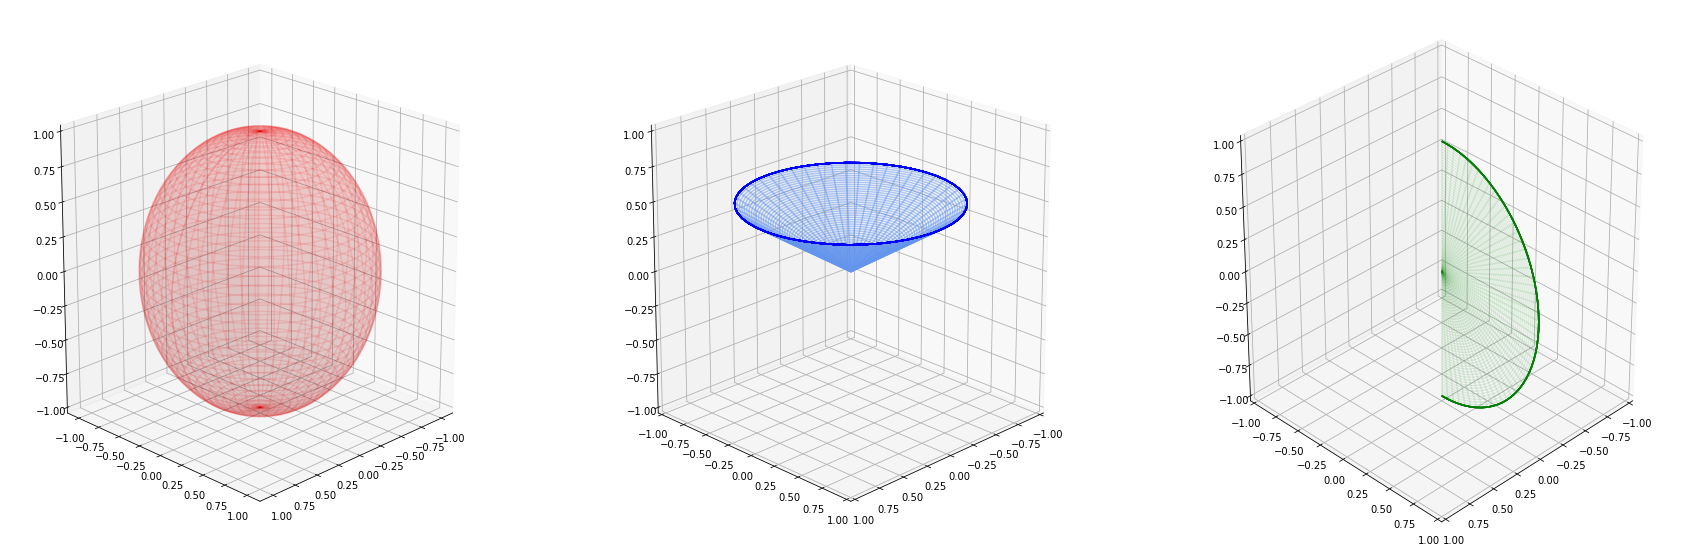

In [3]:
fig = plt.figure(figsize=(30,10)) 

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 3, 1, projection='3d')

# sphere
fig1 = ax.plot_wireframe(x, y, z, color="r", alpha = 0.1) 
ax.plot_surface(x, y, z, color="r", alpha = 0.1) 
ax.view_init(20, 45)

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 3, 2, projection='3d')

# fixed theta plane
ax.plot_wireframe(xt, yt, zt, color="cornflowerblue", alpha = 0.5)   
ax.plot_wireframe(xt1, yt1, zt1, color="b", alpha = 0.5) 
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.view_init(20, 45)

#===============
# Third subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 3, 3, projection='3d')

# fixed phi plane
ax.plot_wireframe(xp, yp, zp, color="g", alpha = 0.1)    
ax.plot_wireframe(xp1, yp1, zp1, color="g", alpha = 0.1)    
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.view_init(30, 45)

#plt.savefig('C:/Users/Ana Ysasi Cillero/Documents/uni/5º curso/TFGFisica/document/coordinates.png')
plt.show()

In spherical coordinates we get that:

Surfaces of the form $r = r_0$ fixed are spheres of radius $r_0$ 

Surfaces of the form $\theta = \theta_0$ fixed, are half-cones at an angle $\theta_0$ form the $z-$axis (plane with $r$ and $\theta$ fixed in dark blue. Plane that cuts the cone of angle theta with the sphere of radius r)

Surfaces of the form $\phi = \phi_0$ fixed, are half-planes at an angle $\phi_0$ form the $x-$axis (plane with $r$ and $\phi$ fixed in dark green. Half plane that cuts with the sphere of radius r)

### 2 electrons

Lets first define the variables

In [4]:
th1 , phi1, th2 , phi2= symbols('theta_1, phi_1, theta_2, phi_2', positive=True) 
x_1=sin(th1)*cos(phi1)
y_1=sin(th1)*sin(phi1)
z_1=cos(th1)
x_2=sin(th2)*cos(phi2)
y_2=sin(th2)*sin(phi2)
z_2=cos(th2)

The energy given by the Coulomb potential is going to be given by: $V_2 \equiv V_{N=2} = \frac{1}{\parallel \bar{r_{1}}-\bar{r_{2}} \parallel_{2}} $ 

In [5]:
V2 = 1/sqrt((x_1-x_2)**2+(y_1-y_2)**2+(z_1-z_2)**2)

In order to find which tuple of values $(\theta_1,\theta_2,\phi_1,\phi_2)$ minimize the energy, we need to first derivate with respect to each one of the variables and then see which values override the derivatives.

Lets then derivate:

In [6]:
V2_th1=(V2.diff(th1))
V2_th2=(V2.diff(th2))
V2_phi1=(V2.diff(phi1))
V2_phi2=(V2.diff(phi2))

The expressions we get are fairly complicated, so in order to simplify them we are going to multiply them by the denominator. But we also need to make sure that the denominator is never nule, which basically means that the particles can never be in the same position. Or in terms of the variables that $(\theta_1,\phi_1) \neq (\theta_2,\phi_2)$.

Once we simplify the expressions we get:

In [7]:
A1 = -(V2_th1*sqrt((x_1-x_2)**2+(y_1-y_2)**2+(z_1-z_2)**2)**3).simplify()
A2 = (V2_th2*sqrt((x_1-x_2)**2+(y_1-y_2)**2+(z_1-z_2)**2)**3).simplify()
A3 = (V2_phi1*sqrt((x_1-x_2)**2+(y_1-y_2)**2+(z_1-z_2)**2)**3).factor()
A4 = -(V2_phi2*sqrt((x_1-x_2)**2+(y_1-y_2)**2+(z_1-z_2)**2)**3).factor()

In [8]:
A1

In [9]:
A2

In [10]:
A3

In [11]:
A4

Since $-sin\phi_1 cos\phi_2 + sin\phi_2 cos\phi_1 = -sin(\phi_1 - \phi_2)$ the las two equations can be rewritten as:

In [12]:
-sin(phi1-phi2)*sin(th1)*sin(th2)

Lets solve: $A3 = A4 = 0$. We have two possible answers:

**Option 1:** If $sin(\theta_1 ) \neq 0$ and $sin(\theta_2) \neq 0$, then $sin(\phi_ 1 - \phi_2) = 0 $, which means that $\phi_i = \pi + \phi_j +k\pi$ (wherre $i,j \in$ {1,2})

Substituting in the first two equations we get ($cos(\phi_ 1 - \phi_2) = 1 $):

$ sin(\theta_1)cos(\theta_2)-sin(\theta_2)cos(\theta_1) = sin(\theta_1 - \theta_2 ) = 0 $ which means that $\theta_i = \pi + \theta_j +k\pi$. Hence: **the electrons are antipodal.**

**Option 2:**  $sin(\theta_1 ) = sin(\theta_2)=0$ we also get $A_1 = A_2 = 0$. So one set of solutions would be: $\theta_i = \pi + k\pi$ for any value of $\phi_i$. Hence: **the electrons are antipodal.**

Let's see how the electrons finally positioned on the surface of the sphere:

Text(0.5, 0, 'z')

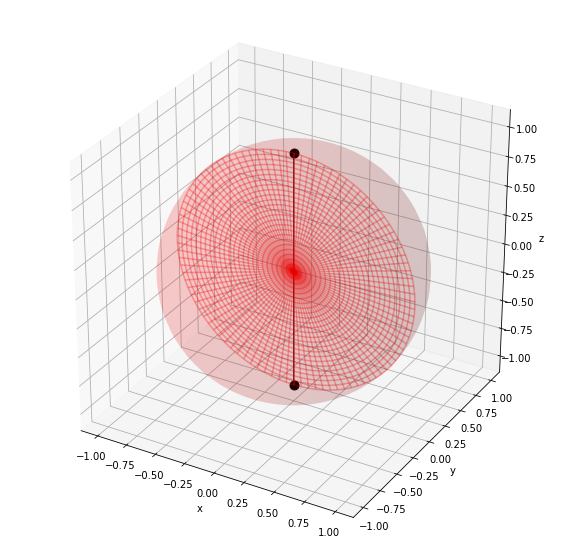

In [13]:
# coordinates of the electrons
phie = [np.pi,2*np.pi] 
thetae = [np.pi,2*np.pi] 

x2 = np.cos(phie[0])*np.sin(thetae[0])
y2 = np.sin(phie[0])*np.sin(thetae[0])
z2 = np.cos(thetae[0]) 

x3 = np.cos(phie[1])*np.sin(thetae[1])
y3 = np.sin(phie[1])*np.sin(thetae[1])
z3 = np.cos(thetae[1])  

# sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)

# plane where the electrons are positioned
rp, vp = np.mgrid[-1:1:50j, 0:np.pi:50j]  
up = 0
xp = rp*np.cos(up)*np.sin(vp) 
yp = rp*np.sin(up)*np.sin(vp)
zp = rp*np.cos(vp) 

# Lets make the graphic
myfig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, color="r", alpha = 0.1)       # sphere 
ax.plot_wireframe(xp, yp, zp, color="r", alpha = 0.3)  # plane 
ax.scatter([x2], [y2], [z2], color="k", s=80)          # electron 1
ax.scatter([x3], [y3], [z3], color="k", s=80)          # electron 2
a = Arrow3D([x2, x3], [y2, y3], [z2, z3], mutation_scale=20,  
            lw=1, arrowstyle="-", color="k")
ax.add_artist(a)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z') 
#plt.savefig('C:/Users/Ana Ysasi Cillero/Documents/uni/5º curso/TFGFisica/document/position2.png')

### 3 electrons

We need to add one more particle, and hence two more variables to the problem. 

In [14]:
th1 , phi1, th2 , phi2, th3 , phi3 = symbols('theta_1, phi_1, theta_2, phi_2, theta_3, phi_3', positive=True) 
x_3=sin(th3)*cos(phi3)
y_3=sin(th3)*sin(phi3)
z_3=cos(th3)

The energy this time is going to be given by the following expression: $V_3 \equiv V_{N=3} = \sum_{i \neq j} \frac{1}{\parallel \bar{r_{i}}-\bar{r_{j}} \parallel_{2}} =\frac{1}{\parallel \bar{r_{1}}-\bar{r_{2}} \parallel_{2}} + \frac{1}{\parallel \bar{r_{1}}-\bar{r_{3}} \parallel_{2}} + \frac{1}{\parallel \bar{r_{2}}-\bar{r_{3}} \parallel_{2}}$

In [15]:
V3=1/sqrt((x_1-x_2)**2+(y_1-y_2)**2+(z_1-z_2)**2) + 1/sqrt((x_1-x_3)**2+(y_1-y_3)**2+(z_1-z_3)**2) + 1/sqrt((x_3-x_2)**2+(y_3-y_2)**2+(z_3-z_2)**2)

Following the previous procedure we minimize the energy as follows:

In [16]:
V3_th1=V3.diff(th1)
V3_th2=V3.diff(th2)
V3_th3=V3.diff(th3)
V3_phi1=V3.diff(phi1)
V3_phi2=V3.diff(phi2)
V3_phi3=V3.diff(phi3)

If we look at the last three equations we have:

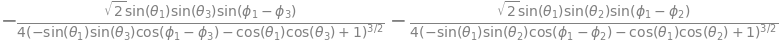

In [17]:
V3_phi1.simplify()

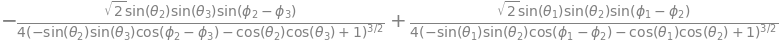

In [18]:
V3_phi2.simplify()

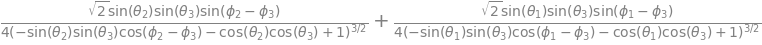

In [19]:
V3_phi3.simplify()

For the last three equations to be zero, a possible solution is $\phi_1 = \phi_2 = \phi_3 = \phi$, which gives us a plane at an angle $ \phi $ from the $ x- $ axis. That means that all three particles need to lie in a plane of the sphere that passes through the origin, i.e: a circumference of maximum radius  inscribed on the sphere. 

Lets substitute this result in the three first equations, and we get:

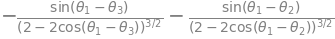

In [20]:
((V3_th1.subs(phi2,phi1)).subs(phi3,phi1)).simplify()

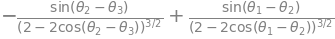

In [21]:
((V3_th2.subs(phi2,phi1)).subs(phi3,phi1)).simplify()

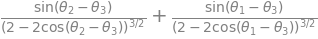

In [22]:
((V3_th3.subs(phi2,phi1)).subs(phi3,phi1)).simplify()

Since  $\phi_1 = \phi_2 = \phi_3 = \phi$, $\theta_1 \neq \theta_2 = \theta_3$ (The denominator will be zero and that is not a solution)

In order to solve this as easy as possible, lets suppose without loss of generality that $\phi_1 = \phi_2 = \phi_3 = 0$ Hence: $sin(\phi) = 0$ and $cos(\phi)=1$. 

Also, witout loss of generality we can fix one of the particles and see where would the other ones position. Then, lets suppose that $\theta_1 = 0$. We now get:

In [23]:
x_1 = 0 # sin(th1) = 0
y_1 = 0 # sin(th1) = 0
z_1 = 1 # cos(th1) = 1
x_2 = sin(th2) # cos(phi) = 1
y_2 = 0        # sin(phi) = 0
z_2 = cos(th2) 
x_3 = sin(th3) # cos(phi) = 1
y_3 = 0        # sin(phi) = 0
z_3 = cos(th3)

V3=1/sqrt((x_1-x_2)**2+(y_1-y_2)**2+(z_1-z_2)**2) + 1/sqrt((x_1-x_3)**2+(y_1-y_3)**2+(z_1-z_3)**2) + 1/sqrt((x_3-x_2)**2+(y_3-y_2)**2+(z_3-z_2)**2)

In [24]:
B2=(V3.diff(th2)).simplify()
B3=(V3.diff(th3)).simplify()

Lets see how they look like:

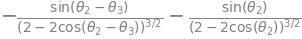

In [25]:
B2

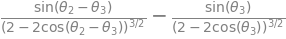

In [26]:
B3

We get two non.linear equations which are fairly difficult to solve. For that reason lets try to solve it graphically.

In [27]:
def f(x, y):
    f0 = -np.sin(x - y)/((2-2*np.cos(x - y))**(3/2)) - np.sin(x)/((2-2*np.cos(x))**(3/2))
    return f0

def g(x, y):
    g0 = np.sin(y - x)/(2-2*np.cos(y - x))**(3/2) - np.sin(x)/(2-2*np.cos(x))**(3/2)
    return g0

x = np.linspace(0, 2*np.pi, 100)
y = np.linspace(0, 2*np.pi, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
Z1 = g(X,Y)

C:\Users\Alejandro Ysasi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\Alejandro Ysasi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\Alejandro Ysasi\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\Alejandro Ysasi\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


We get some nan values since the function gets complex and infinite values at some points.

In order to find the zeros, lets constuct the zero plane (called Z2) with the same "grid" as Z and Z1. Since we are looking for the zeros of the funtions, the values of Z and Z1 that coincides with Z2 sill be our solutions. 

In [28]:
Z2 = 0*Z      #we make all the values zero
Z2[Z2 != 0]=0 #we make sure the nan and inf values are also zero 

C:\Users\Alejandro Ysasi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


We are now going to delete all the points of the surfaces given by Z and Z1 that are not null, i.e: that are not equal to Z2

In [29]:
Z[Z != Z2] = nan
Z1[Z1 != Z2] = nan

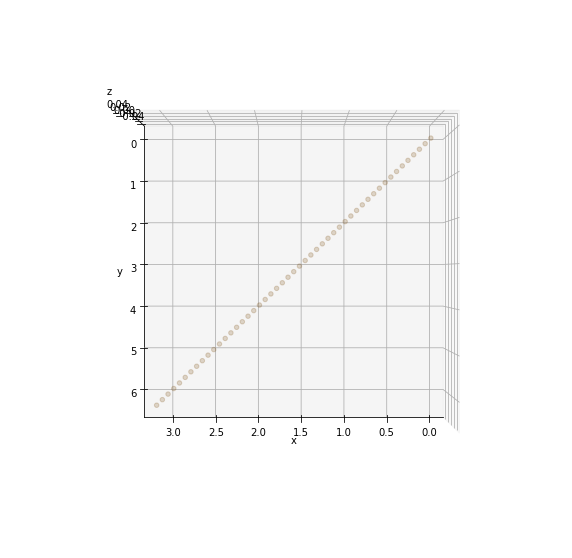

In [30]:
# Lets make the graphic
myfig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
# plots 
ax.scatter(X, Y, Z, color='r', alpha = 0.1)  
ax.scatter(X, Y, Z1, color='g', alpha = 0.1)   
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(90, 90) # rotation of the graph to see from the top
#plt.savefig('C:/Users/Ana Ysasi Cillero/Documents/uni/5º curso/TFGFisica/document/zeros.png')

If we look at the points, we can easily see that they lie in the line $y = 2x$ or equivalently, in our problems notation: $\theta _ 2 = 2 \theta_3$.

But since our three points must lie in the sphere we have the restiction that necessarily $\theta_1 + \theta_2 + \theta_3 = 2\pi$ and since we chose that $\theta_1 = 0$ and we just got that $\theta _ 2 = 2 \theta_3$ we finally get that: $3\theta_2 = 2\pi$. Hence $\theta_2 = \frac{2\pi}{3}$ and $\theta_3 = \frac{4\pi}{3}$. Just to check that our solution is right, lets see if once we substitute in $f(x,y)$ and $g(x,y)$ with  $x = \frac{2\pi}{3}$ and $y = \frac{4\pi}{3}$ we get zero.

In [31]:
f(2*np.pi/3,4*np.pi/3)

In [32]:
g(2*np.pi/3,4*np.pi/3)

Let's see how the electrons finally positioned on the surface of the sphere:

Text(0.5, 0, 'z')

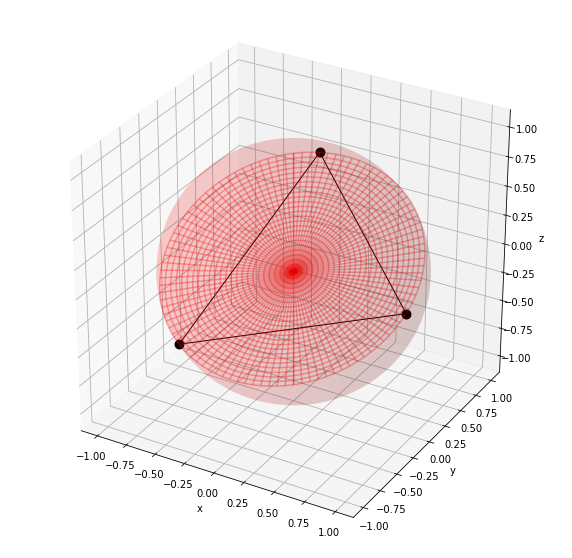

In [6]:
# coordinates of the electrons
phi2 = [np.pi/4]*3
theta2 = [2*np.pi/3,2*np.pi/3+2*np.pi/3,2*np.pi/34*np.pi/3] 

x2 = np.cos(phi2[0])*np.sin(theta2[0])
y2 = np.sin(phi2[0])*np.sin(theta2[0])
z2 = np.cos(theta2[0]) 

x3 = np.cos(phi2[1])*np.sin(theta2[1])
y3 = np.sin(phi2[1])*np.sin(theta2[1])
z3 = np.cos(theta2[1]) 

x4 = np.cos(phi2[2])*np.sin(theta2[2])
y4 = np.sin(phi2[2])*np.sin(theta2[2])
z4 = np.cos(theta2[2]) 

# sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)

# plane where the electrons are positioned
rp, vp = np.mgrid[-1:1:50j, 0:np.pi:50j]  
up = phi2[0]
xp = rp*np.cos(up)*np.sin(vp) 
yp = rp*np.sin(up)*np.sin(vp)
zp = rp*np.cos(vp)

# Lets make the graphic
myfig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, color="r", alpha = 0.1)      # sphere
ax.plot_wireframe(xp, yp, zp, color="r", alpha = 0.3) # plane 
ax.scatter([x2], [y2], [z2], color="k", s=80)         # electron 1
ax.scatter([x3], [y3], [z3], color="k", s=80)         # electron 2 
ax.scatter([x4], [y4], [z4], color="k", s=80)         # electron 3
a1 = Arrow3D([x2, x3], [y2, y3], [z2, z3], mutation_scale=20, #side of the equilateral triangle
            lw=1, arrowstyle="-", color="k")
a2 = Arrow3D([x2, x4], [y2, y4], [z2, z4], mutation_scale=20, #side of the equilateral triangle
            lw=1, arrowstyle="-", color="k")
a3 = Arrow3D([x4, x3], [y4, y3], [z4, z3], mutation_scale=20, #side of the equilateral triangle
            lw=1, arrowstyle="-", color="k")
ax.add_artist(a1)
ax.add_artist(a2)
ax.add_artist(a3)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z') 
#plt.savefig('C:/Users/Ana Ysasi Cillero/Documents/uni/5º curso/TFGFisica/document/position3.png')

### 4 electrons

First, without lost of generality, lets fix one of the electrons, for example, for simplicity, lets fix the first electron with variables: $(\theta, \phi)=(0,0)$. Then the first electron is going to be placed at $e_{1}=(0,0,1)$

Also, necesarly, three of the electrons will always be on the same plane. We can suppose w.l.o.g. that $ \theta_1 = \theta_2 = \theta_3 = \theta $. 

Then the position of the four electrons are:

In [34]:
th, th4 , phi4, phi2 = symbols('theta, theta_4, phi_4, phi_2', positive=True) 

x_1 = 0  
y_1 = 0
z_1 = 1

x_2 = sin(th)*cos(phi2)
y_2 = sin(th)*sin(phi2)
z_2 = cos(th)

x_3 = sin(th)*cos(phi3)
y_3 = sin(th)*sin(phi3)
z_3 = cos(th)

x_4 = sin(th)*cos(phi4) 
y_4 = sin(th)*sin(phi4) 
z_4 = cos(th) 

With a potential given by:

$V_4 \equiv V_{N=4} = \sum_{i \neq j} \frac{1}{\parallel \bar{r_{i}}-\bar{r_{j}} \parallel_{2}} =\frac{1}{\parallel \bar{r_{1}}-\bar{r_{2}} \parallel_{2}} + \frac{1}{\parallel \bar{r_{1}}-\bar{r_{3}} \parallel_{2}} + \frac{1}{\parallel \bar{r_{2}}-\bar{r_{3}} \parallel_{2}} +  \frac{1}{\parallel \bar{r_{1}}-\bar{r_{4}} \parallel_{2}} + \frac{1}{\parallel \bar{r_{2}}-\bar{r_{4}} \parallel_{2}} + \frac{1}{\parallel \bar{r_{3}}-\bar{r_{4}} \parallel_{2}}$

In [35]:
V4=1/sqrt((x_1-x_2)**2+(y_1-y_2)**2+(z_1-z_2)**2) + 1/sqrt((x_1-x_3)**2+(y_1-y_3)**2+(z_1-z_3)**2) + 1/sqrt((x_3-x_2)**2+(y_3-y_2)**2+(z_3-z_2)**2) + 1/sqrt((x_1-x_4)**2+(y_1-y_4)**2+(z_1-z_4)**2) + 1/sqrt((x_4-x_2)**2+(y_4-y_2)**2+(z_4-z_2)**2) + 1/sqrt((x_3-x_4)**2+(y_3-y_4)**2+(z_3-z_4)**2)

In [36]:
V4_th=V4.diff(th) 
V4_phi2=V4.diff(phi2)
V4_phi3=V4.diff(phi3)
V4_phi4=V4.diff(phi4)

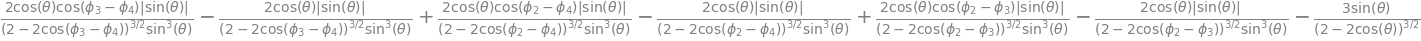

In [37]:
V4_th.simplify()

Lets first see the form of the derivatives w.r.t. the angle $\phi$

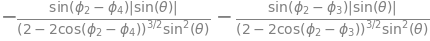

In [38]:
V4_phi2.simplify()

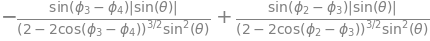

In [39]:
V4_phi3.simplify()

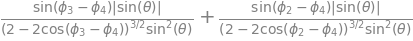

In [40]:
V4_phi4.simplify()

Lets look at the derivatives that we obtained in the previous example (for N=3), lets call them V3_th

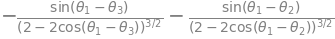

In [41]:
((V3_th1.subs(phi2,phi1)).subs(phi3,phi1)).simplify()

We can see that they have exactly the same form, changing the indexes (the indexes are permuted: (1,2,3) now are (2,3,4)) and changing the variable $\theta$ by $\phi$ and multiplied by a factor: $$ \frac{\mid sin(\theta) \mid}{sin^2(\theta)} = \frac{1}{\mid sin(\theta) \mid}$$

Which means that the tuple $(\theta_1,\theta_2,\theta_4)$ that nulled the equations V3_th will also be a solution for this case for the variables $(\phi_2,\phi_3,\phi_4)$. Hence:  

$$\phi_1 = 0, \phi_2 = \frac{2\pi}{3}, \phi_3 = \frac{4\pi}{3}$$

If we substitute this values in the coordinates we get

In [42]:
x_1 = 0  
y_1 = 0
z_1 = 1

x_2 = sin(th)
y_2 = 0
z_2 = cos(th)

x_3 = -sin(th)/2
y_3 = np.sqrt(3)*sin(th)/2
z_3 = cos(th)

x_4 = -sin(th)/2
y_4 = -np.sqrt(3)*sin(th)/2
z_4 = cos(th) 

The potential will be:

In [43]:
V4=1/sqrt((x_1-x_2)**2+(y_1-y_2)**2+(z_1-z_2)**2) + 1/sqrt((x_1-x_3)**2+(y_1-y_3)**2+(z_1-z_3)**2) + 1/sqrt((x_3-x_2)**2+(y_3-y_2)**2+(z_3-z_2)**2) + 1/sqrt((x_1-x_4)**2+(y_1-y_4)**2+(z_1-z_4)**2) + 1/sqrt((x_4-x_2)**2+(y_4-y_2)**2+(z_4-z_2)**2) + 1/sqrt((x_3-x_4)**2+(y_3-y_4)**2+(z_3-z_4)**2)

In order to minimize it, lets derivate with respect to $\theta$

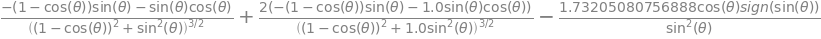

In [44]:
V4.diff(th) 

rewritting the previous we get that the derivative is of the form:
$$ \frac{\partial V_4}{\partial \theta} = 3\frac{-(1-cos(\theta))sin(\theta) - sin(\theta) cos(\theta)}{((1-cos(\theta))^2+sin^2(\theta))^{3/2}} - \frac{\sqrt{3}cos(\theta)}{sin^2(\theta)} $$

Since we can not solve it directly (it is non-linear) lets plot the function to see the roots

In [30]:
from sympy.plotting import plot

In [31]:
x = symbols('x', positive=True) 
h = 3*(-(1-cos(x))*sin(x)-sin(x)*cos(x))/((1-cos(x))**2+sin(x)**2)**(3/2) -np.sqrt(3)*(cos(x))/(sin(x)**2)

Since $\theta \in (0,\pi)$, lets plot it in that interval

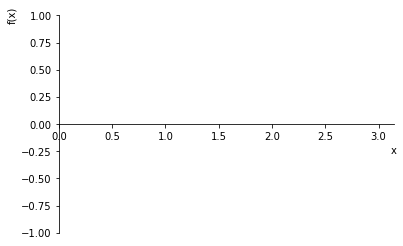

In [32]:
p1 = plot(h, (x,0,np.pi),  ylim = (-1,1), show  = False)
#p1.save('./root1.png')
p1.show()

The root seems to be in between $(1.8,2)$, lets zoom in that interval

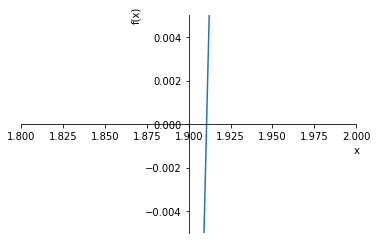

In [24]:
p2 = plot(h, (x,1.80,2), ylim = (-0.005,0.005), show  = False)
#p2.save('./root2.png')
p2.show()

To be a little more precise, lets zoom in $(1.91,1.92)$

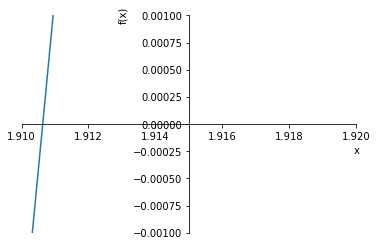

In [26]:
p3 = plot(h, (x,1.91,1.92), ylim = (-0.001,0.001), show  = False)
#p3.save('./root3.png')
p3.show()

We can conclude that $\theta \approx 1.9105$. Lets see how much it will be the cosine of this angle (it will define the $z-$coordinate of the three electrons)

In [50]:
cos(1.9105)

Hence, it seems that $cos(\theta) = -1/3$

 Substituting $\phi_1 = 0, \phi_2 = \frac{2\pi}{3}, \frac{4\pi}{3}$ and $\theta = arccos(-1/3) \approx 1.906$, we have that the coordinates of the electrons in the sphere are going to be:
 
 $e_{1}=(0,0,1)$
  
 $e_{2}=({\sqrt {\frac {8}{9}}},0,-{\frac {1}{3}})$, $\phi_2 = 0$

 $e_{3}=(-{\sqrt {\frac {2}{9}}},{\sqrt {\frac {2}{3}}},-{\frac {1}{3}})$, $\phi_3=\frac{2\pi}{3}$

 $e_{4}=(-{\sqrt {\frac {2}{9}}},-{\sqrt {\frac {2}{3}}},-{\frac {1}{3}})$, $\phi_4=-\frac{\pi}{3}$

i.e, a **Tetrahedron** with the edge length of $ \sqrt{\frac {8}{3}}$

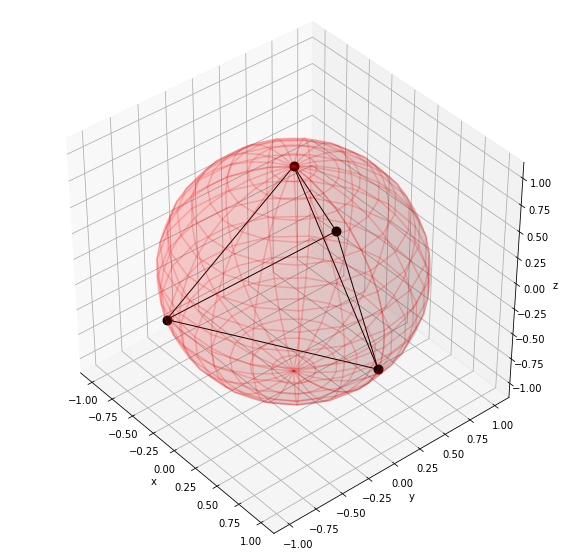

In [6]:
# coordinates of the electrons 
phi2 = [0,2*np.pi/3,4*np.pi/3]
theta2 = [np.arccos(-1/3)]*3

x1 = 0  
y1 = 0
z1 = 1

x2 = np.cos(phi2[0])*np.sin(theta2[0])
y2 = np.sin(phi2[0])*np.sin(theta2[0])
z2 = np.cos(theta2[0]) 

x3 = np.cos(phi2[1])*np.sin(theta2[1])
y3 = np.sin(phi2[1])*np.sin(theta2[1])
z3 = np.cos(theta2[1]) 

x4 = np.cos(phi2[2])*np.sin(theta2[2])
y4 = np.sin(phi2[2])*np.sin(theta2[2])
z4 = np.cos(theta2[2]) 

# sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)

ux, vx = np.mgrid[0:2*np.pi:20j, 0:np.pi:20j]
xx = np.cos(ux)*np.sin(vx)
yy = np.sin(ux)*np.sin(vx)
zz = np.cos(vx)

# plane where the three electrons are positioned
rt, ut = np.mgrid[0:1:50j, 0:2*np.pi:50j]  
vt = np.arccos(-1/3)
xt = rt*np.cos(ut)*np.sin(vt) 
yt = rt*np.sin(ut)*np.sin(vt)
zt = rt*np.cos(vt)

# Lets make the graphic
myfig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, color="r", alpha = 0.1)      # sphere  
ax.plot_wireframe(xx, yy, zz, color="r", alpha = 0.2)      # sphere  
ax.scatter([x1], [y1], [z1], color="k", s=80)         # electron 1
ax.scatter([x2], [y2], [z2], color="k", s=80)         # electron 2
ax.scatter([x3], [y3], [z3], color="k", s=80)         # electron 3 
ax.scatter([x4], [y4], [z4], color="k", s=80)         # electron 4
a1 = Arrow3D([x2, x3], [y2, y3], [z2, z3], mutation_scale=20, #Lets plot the sides of Tetrahedron
            lw=1, arrowstyle="-", color="k")
a2 = Arrow3D([x2, x4], [y2, y4], [z2, z4], mutation_scale=20,
            lw=1, arrowstyle="-", color="k")
a3 = Arrow3D([x4, x3], [y4, y3], [z4, z3], mutation_scale=20,
            lw=1, arrowstyle="-", color="k")
a4 = Arrow3D([x2, x1], [y2, y1], [z2, z1], mutation_scale=20, 
            lw=1, arrowstyle="-", color="k")
a5 = Arrow3D([x1, x4], [y1, y4], [z1, z4], mutation_scale=20, 
            lw=1, arrowstyle="-", color="k")
a6 = Arrow3D([x1, x3], [y1, y3], [z1, z3], mutation_scale=20, 
            lw=1, arrowstyle="-", color="k")
ax.add_artist(a1)
ax.add_artist(a2)
ax.add_artist(a3)
ax.add_artist(a4)
ax.add_artist(a5)
ax.add_artist(a6)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z') 
ax.view_init(40, -40)
plt.savefig('./position4.png')

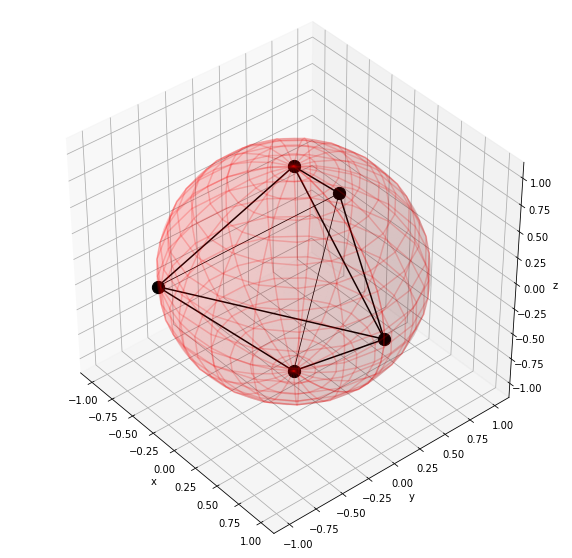

In [9]:
# coordinates of the electrons
phi2 = [0,2*np.pi/3,4*np.pi/3]
theta2 = [np.pi/2]*3

x1 = 0
y1 = 0
z1 = 1

x2 = np.cos(phi2[0])*np.sin(theta2[0])
y2 = np.sin(phi2[0])*np.sin(theta2[0])
z2 = np.cos(theta2[0])

x3 = np.cos(phi2[1])*np.sin(theta2[1])
y3 = np.sin(phi2[1])*np.sin(theta2[1])
z3 = np.cos(theta2[1])

x4 = np.cos(phi2[2])*np.sin(theta2[2])
y4 = np.sin(phi2[2])*np.sin(theta2[2])
z4 = np.cos(theta2[2])

x5 = 0 
y5 = 0
z5 = -1

# sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
uu, vv = np.mgrid[0:2*np.pi:20j, 0:np.pi:20j]
xx = np.cos(uu)*np.sin(vv)
yy = np.sin(uu)*np.sin(vv)
zz = np.cos(vv)

# Lets make the graphic
myfig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, color="r", alpha = 0.1)       # sphere smooth
ax.plot_wireframe(xx, yy, zz, color="r", alpha = 0.2)  # sphere lines
ax.scatter([x1], [y1], [z1], color="k", s=150)         # electron 1
ax.scatter([x2], [y2], [z2], color="k", s=150)         # electron 2
ax.scatter([x3], [y3], [z3], color="k", s=150)         # electron 3
ax.scatter([x4], [y4], [z4], color="k", s=150)         # electron 4
ax.scatter([x5], [y5], [z5], color="k", s=150)         # electron 4
a1 = Arrow3D([x2, x3], [y2, y3], [z2, z3], mutation_scale=20, #Lets plot the sides of Tetrahedron
            lw=1.5, arrowstyle="-", color="k")
a2 = Arrow3D([x2, x4], [y2, y4], [z2, z4], mutation_scale=20,
            lw=1.5, arrowstyle="-", color="k")
a3 = Arrow3D([x4, x3], [y4, y3], [z4, z3], mutation_scale=20,
            lw=0.75, arrowstyle="-", color="k")
a4 = Arrow3D([x2, x1], [y2, y1], [z2, z1], mutation_scale=20,
            lw=1.5, arrowstyle="-", color="k")
a5 = Arrow3D([x1, x4], [y1, y4], [z1, z4], mutation_scale=20,
            lw=1.5, arrowstyle="-", color="k")
a6 = Arrow3D([x1, x3], [y1, y3], [z1, z3], mutation_scale=20,
            lw=1.5, arrowstyle="-", color="k")
a7 = Arrow3D([x4, x5], [y4, y5], [z4, z5], mutation_scale=20,
            lw=1.5, arrowstyle="-", color="k")
a8 = Arrow3D([x2, x5], [y2, y5], [z2, z5], mutation_scale=20,
            lw=1.5, arrowstyle="-", color="k")
a9 = Arrow3D([x3, x5], [y3, y5], [z3, z5], mutation_scale=20,
            lw=0.75, arrowstyle="-", color="k")
a10 = Arrow3D([x4, x5], [y4, y5], [z4, z5], mutation_scale=20,
            lw=1.5, arrowstyle="-", color="k")

ax.add_artist(a1)
ax.add_artist(a2)
ax.add_artist(a3)
ax.add_artist(a4)
ax.add_artist(a5)
ax.add_artist(a6)
ax.add_artist(a7)
ax.add_artist(a8)
ax.add_artist(a9)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(40, -40)
plt.savefig('./document/images/position5.png') 

In [33]:
x = symbols('x', positive=True) 
h1 = - np.sqrt(3)*cos(x)/(sin(x)**2) + 3*np.sqrt(2)*sin(x)/(4*(cos(x) + 1)**(3/2)) - 3*sin(x)/(2 - 2*cos(x))**(3/2) 

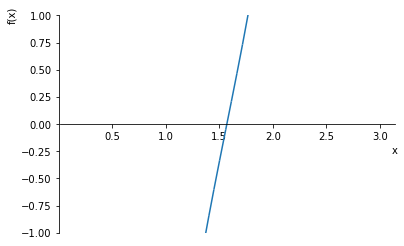

In [46]:
p11 = plot(h1, (x,0.01,3.14), axis_center = (0,0), ylim = (-1,1), show  = False)
p11.save('./document/images/root11.png')
p11.show()

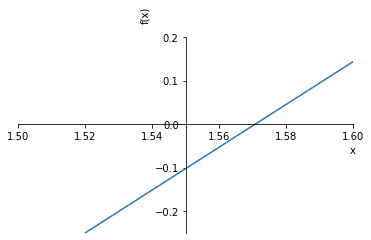

In [48]:
p12 = plot(h1, (x,1.5,1.6), ylim = (-0.25,0.25), show  = False)
p12.save('./document/images/root12.png')
p12.show() 

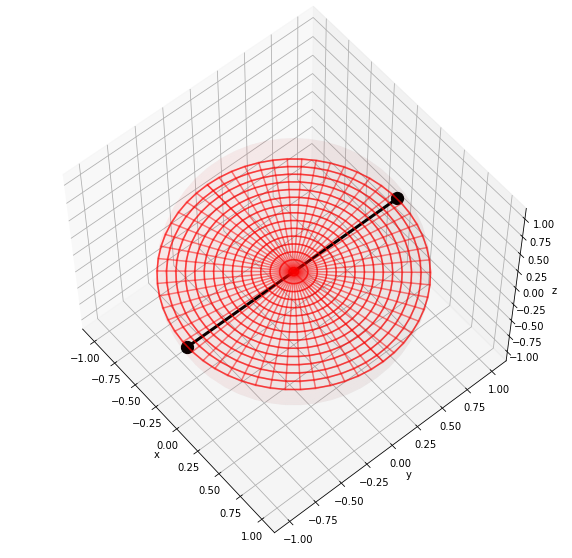

In [12]:
# coordinates of the electrons
x2 = 0
y2 = 1
z2 = 0

x3 = 0
y3 = -1
z3 = 0 

# sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)

# plane phi fixed 
rp, up = np.mgrid[-1:1:30j, 0:2*np.pi:30j]  
vp = np.pi/2
xp = rp*np.cos(up)*np.sin(vp) 
yp = rp*np.sin(up)*np.sin(vp)
zp = rp*np.cos(vp)  

# Lets make the graphic
myfig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, color="r", alpha = 0.03)       # sphere 
ax.plot_wireframe(xp, yp, zp, color="r", alpha = 0.5)  # plane phi 
ax.scatter([x2], [y2], [z2], color="k", s=150)          # electron 1
ax.scatter([x3], [y3], [z3], color="k", s=150)          # electron 2
a = Arrow3D([x2, x3], [y2, y3], [z2, z3], mutation_scale=50,  
            lw=3, arrowstyle="-", color="k")
ax.add_artist(a)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z') 
ax.view_init(60, -40)
plt.savefig('C:/Users/Ana Ysasi Cillero/Documents/uni/5º curso/TFGFisica/document/images/Dinf.png')

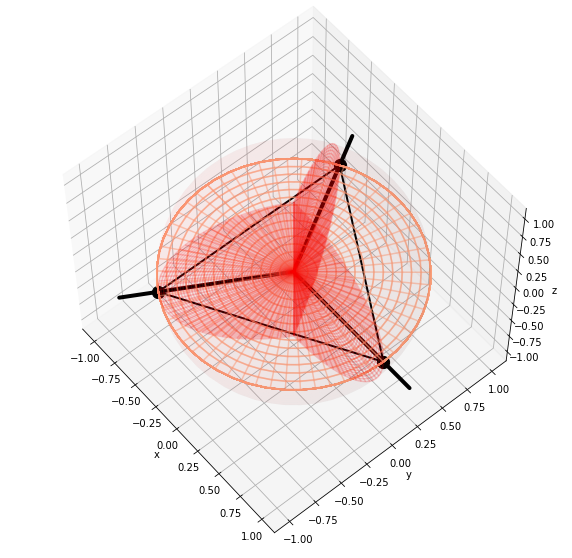

In [13]:
# coordinates of the electrons
#[x2,y2,z2] = [0,np.sqrt(3)/2,-1/2] 
#[x3,y3,z3] = [0,-np.sqrt(3)/2,-1/2] 
#[x4,y4,z4] = [0,0,1] 
 
x2 = -1/2
y2 = np.sqrt(3)/2
z2 = 0

x3 = -1/2
y3 = -np.sqrt(3)/2
z3 = 0

x4 = 1
y4 = 0
z4 = 0


phi2 = [np.pi/2]*3
theta2 = [2*np.pi/3,2*np.pi/3+2*np.pi/3,2*np.pi/34*np.pi/3] 

x12 = 1.3*x2
y12 = 1.3*y2
z12 = 1.3*z2

x13 = 1.3*x3
y13 = 1.3*y3
z13 = 1.3*z3

x14 = 1.3
y14 = 0
z14 = 0

# sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)

# plane th fixed 
rt1, vt1 = np.mgrid[0:1:40j, 0:np.pi:40j]  
ut1 = 0
xt1 = rt1*np.cos(ut1)*np.sin(vt1) 
yt1 = rt1*np.sin(ut1)*np.sin(vt1)
zt1 = rt1*np.cos(vt1) 

# plane th fixed 
rt2, vt2 = np.mgrid[0:1:40j, 0:np.pi:40j]  
ut2 = 2*np.pi/3
xt2 = rt2*np.cos(ut2)*np.sin(vt2) 
yt2 = rt2*np.sin(ut2)*np.sin(vt2)
zt2 = rt2*np.cos(vt2)

# plane th fixed 
rt3, vt3 = np.mgrid[0:1:50j, 0:np.pi:50j] 
ut3 = 4*np.pi/3
xt3 = rt3*np.cos(ut3)*np.sin(vt3) 
yt3 = rt3*np.sin(ut3)*np.sin(vt3)
zt3 = rt3*np.cos(vt3) 

# plane where the electrons are positioned
rp, up = np.mgrid[-1:1:30j, 0:2*np.pi:30j]  
vp = np.pi/2
xp = rp*np.cos(up)*np.sin(vp) 
yp = rp*np.sin(up)*np.sin(vp)
zp = rp*np.cos(vp)
utf, vtf = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j] #fixed r and theta 
vtf = 0*vtf + np.pi/2
xtf = np.cos(utf)*np.sin(vtf)  
ytf = np.sin(utf)*np.sin(vtf)
ztf = np.cos(vtf)

# Lets make the graphic
myfig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, color="r", alpha = 0.03)      # sphere
ax.plot_wireframe(xp, yp, zp, color="lightsalmon", alpha = 0.5) # plane 
ax.plot_wireframe(xtf, ytf, ztf, color="lightsalmon", alpha = 0.4)  # plane phi 
ax.scatter([0], [0], [0], color="k", s=50)         # centro
ax.plot_wireframe(xt1, yt1, zt1, color="r", alpha = 0.2)  # plane th1 
ax.plot_wireframe(xt2, yt2, zt2, color="r", alpha = 0.2)  # plane th2 
ax.plot_wireframe(xt3, yt3, zt3, color="r", alpha = 0.2)  # plane th3 
ax.scatter([x2], [y2], [z2], color="k", s=150)         # electron 1
ax.scatter([x3], [y3], [z3], color="k", s=150)         # electron 2 
ax.scatter([x4], [y4], [z4], color="k", s=150)         # electron 3
a1 = Arrow3D([x2, x3], [y2, y3], [z2, z3], mutation_scale=20, #side of the equilateral triangle
            lw=2, arrowstyle="-", color="k")
a2 = Arrow3D([x2, x4], [y2, y4], [z2, z4], mutation_scale=20, #side of the equilateral triangle
            lw=2, arrowstyle="-", color="k")
a3 = Arrow3D([x4, x3], [y4, y3], [z4, z3], mutation_scale=20, #side of the equilateral triangle
            lw=2, arrowstyle="-", color="k")
ax.add_artist(a1)
ax.add_artist(a2)
ax.add_artist(a3) 

a4 = Arrow3D([0, x13], [0, y13], [0, z13], mutation_scale=20, #side of the equilateral triangle
            lw=4, arrowstyle="-", color="k")
a5 = Arrow3D([0, x14], [0, y14], [0, z14], mutation_scale=20, #side of the equilateral triangle
            lw=4, arrowstyle="-", color="k")
a6 = Arrow3D([0, x12], [0, y12], [0, z12], mutation_scale=20, #side of the equilateral triangle
            lw=4, arrowstyle="-", color="k")
ax.add_artist(a4)
ax.add_artist(a5)
ax.add_artist(a6) 

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z') 
ax.view_init(60, -40)
plt.savefig('C:/Users/Ana Ysasi Cillero/Documents/uni/5º curso/TFGFisica/document/images/D3h.png')

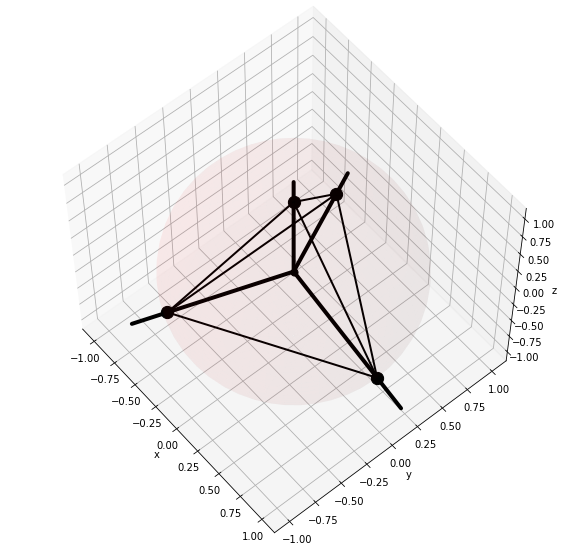

In [16]:
# coordinates of the electrons 
phi2 = [0,2*np.pi/3,4*np.pi/3]
theta2 = [np.arccos(-1/3)]*3

x1 = 0  
y1 = 0
z1 = 1

x2 = np.cos(phi2[0])*np.sin(theta2[0])
y2 = np.sin(phi2[0])*np.sin(theta2[0])
z2 = np.cos(theta2[0]) 

x3 = np.cos(phi2[1])*np.sin(theta2[1])
y3 = np.sin(phi2[1])*np.sin(theta2[1])
z3 = np.cos(theta2[1]) 

x4 = np.cos(phi2[2])*np.sin(theta2[2])
y4 = np.sin(phi2[2])*np.sin(theta2[2])
z4 = np.cos(theta2[2]) 

x11 = 0  
y11 = 0
z11 = 1.3

x12 = 1.3*np.cos(phi2[0])*np.sin(theta2[0])
y12 = 1.3*np.sin(phi2[0])*np.sin(theta2[0])
z12 = 1.3*np.cos(theta2[0]) 

x13 = 1.3*np.cos(phi2[1])*np.sin(theta2[1])
y13 = 1.3*np.sin(phi2[1])*np.sin(theta2[1])
z13 = 1.3*np.cos(theta2[1]) 

x14 = 1.3*np.cos(phi2[2])*np.sin(theta2[2])
y14 = 1.3*np.sin(phi2[2])*np.sin(theta2[2])
z14 = 1.3*np.cos(theta2[2])

# sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)

# plane where the three electrons are positioned
rt, ut = np.mgrid[0:1:50j, 0:2*np.pi:50j]  
vt = np.arccos(-1/3)
xt = rt*np.cos(ut)*np.sin(vt) 
yt = rt*np.sin(ut)*np.sin(vt)
zt = rt*np.cos(vt)

# Lets make the graphic
myfig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, color="r", alpha = 0.03)      # sphere  
ax.scatter([0], [0], [0], color="k", s=50)         # centro
ax.scatter([x1], [y1], [z1], color="k", s=150)         # electron 1
ax.scatter([x2], [y2], [z2], color="k", s=150)         # electron 2
ax.scatter([x3], [y3], [z3], color="k", s=150)         # electron 3 
ax.scatter([x4], [y4], [z4], color="k", s=150)         # electron 4
a1 = Arrow3D([x2, x3], [y2, y3], [z2, z3], mutation_scale=20, #Lets plot the sides of Tetrahedron
            lw=2, arrowstyle="-", color="k")
a2 = Arrow3D([x2, x4], [y2, y4], [z2, z4], mutation_scale=20,
            lw=2, arrowstyle="-", color="k")
a3 = Arrow3D([x4, x3], [y4, y3], [z4, z3], mutation_scale=20,
            lw=2, arrowstyle="-", color="k")
a4 = Arrow3D([x2, x1], [y2, y1], [z2, z1], mutation_scale=20, 
            lw=2, arrowstyle="-", color="k")
a5 = Arrow3D([x1, x4], [y1, y4], [z1, z4], mutation_scale=20, 
            lw=2, arrowstyle="-", color="k")
a6 = Arrow3D([x1, x3], [y1, y3], [z1, z3], mutation_scale=20, 
            lw=2, arrowstyle="-", color="k")
ax.add_artist(a1)
ax.add_artist(a2)
ax.add_artist(a3)
ax.add_artist(a4)
ax.add_artist(a5)
ax.add_artist(a6)

a7 = Arrow3D([0, x13], [0, y13], [0, z13], mutation_scale=20, #side of the equilateral triangle
            lw=4, arrowstyle="-", color="k")
a8 = Arrow3D([0, x14], [0, y14], [0, z14], mutation_scale=20, #side of the equilateral triangle
            lw=4, arrowstyle="-", color="k")
a9 = Arrow3D([0, x12], [0, y12], [0, z12], mutation_scale=20, #side of the equilateral triangle
            lw=4, arrowstyle="-", color="k")
a10 = Arrow3D([0, x11], [0, y11], [0, z11], mutation_scale=20, #side of the equilateral triangle
            lw=4, arrowstyle="-", color="k")
ax.add_artist(a7)
ax.add_artist(a8)
ax.add_artist(a9) 
ax.add_artist(a10) 

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z') 
ax.view_init(60, -40)
plt.savefig('C:/Users/Ana Ysasi Cillero/Documents/uni/5º curso/TFGFisica/document/images/Td.png')

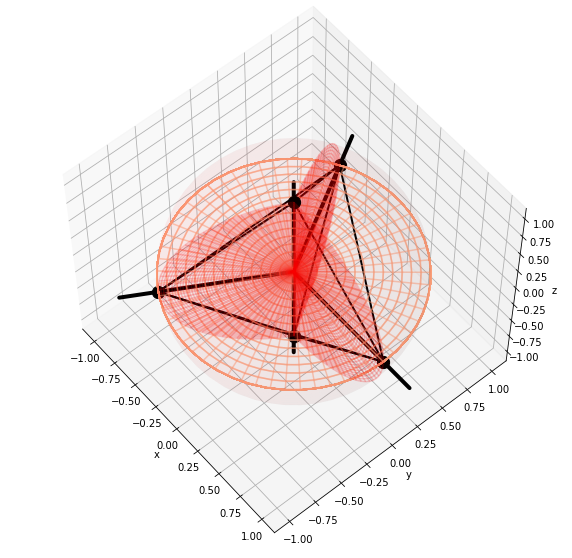

In [15]:
# coordinates of the electrons 
phi2 = [0,2*np.pi/3,4*np.pi/3]
theta2 = [np.pi/2]*3

x1 = 0 
y1 = 0
z1 = 1

x2 = np.cos(phi2[0])*np.sin(theta2[0])
y2 = np.sin(phi2[0])*np.sin(theta2[0])
z2 = np.cos(theta2[0]) 

x3 = np.cos(phi2[1])*np.sin(theta2[1])
y3 = np.sin(phi2[1])*np.sin(theta2[1])
z3 = np.cos(theta2[1]) 

x4 = np.cos(phi2[2])*np.sin(theta2[2])
y4 = np.sin(phi2[2])*np.sin(theta2[2])
z4 = np.cos(theta2[2]) 

x5 = 0  
y5 = 0
z5 = -1

#####

x11 = 0 
y11 = 0
z11 = 1.3

x12 = 1.3*x2
y12 = 1.3*y2
z12 = 1.3*z2

x13 = 1.3*x3
y13 = 1.3*y3
z13 = 1.3*z3

x14 = 1.3*x4
y14 = 1.3*y4
z14 = 1.3*z4

x15 = 0
y15 = 0
z15 = -1.3

# sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)

# sphere
uu, vv = np.mgrid[0:2*np.pi:20j, 0:np.pi:20j]
xx = np.cos(uu)*np.sin(vv)
yy = np.sin(uu)*np.sin(vv)
zz = np.cos(vv)

# plane phi fixed 
rp, up = np.mgrid[-1:1:30j, 0:2*np.pi:30j]  
vp = np.pi/2
xp = rp*np.cos(up)*np.sin(vp) 
yp = rp*np.sin(up)*np.sin(vp)
zp = rp*np.cos(vp)
utf, vtf = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j] #fixed r and theta 
vtf = 0*vtf + np.pi/2
xtf = np.cos(utf)*np.sin(vtf)  
ytf = np.sin(utf)*np.sin(vtf)
ztf = np.cos(vtf)

# plane th fixed 
rt1, vt1 = np.mgrid[0:1:40j, 0:np.pi:40j]  
ut1 = 0
xt1 = rt1*np.cos(ut1)*np.sin(vt1) 
yt1 = rt1*np.sin(ut1)*np.sin(vt1)
zt1 = rt1*np.cos(vt1) 

# plane th fixed 
rt2, vt2 = np.mgrid[0:1:40j, 0:np.pi:40j]  
ut2 = 2*np.pi/3
xt2 = rt2*np.cos(ut2)*np.sin(vt2) 
yt2 = rt2*np.sin(ut2)*np.sin(vt2)
zt2 = rt2*np.cos(vt2)

# plane th fixed 
rt3, vt3 = np.mgrid[0:1:50j, 0:np.pi:50j] 
ut3 = 4*np.pi/3
xt3 = rt3*np.cos(ut3)*np.sin(vt3) 
yt3 = rt3*np.sin(ut3)*np.sin(vt3)
zt3 = rt3*np.cos(vt3) 

# Lets make the graphic
myfig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, color="r", alpha = 0.03)      # sphere 
ax.plot_wireframe(xp, yp, zp, color="lightsalmon", alpha = 0.5) # plane 
ax.plot_wireframe(xtf, ytf, ztf, color="lightsalmon", alpha = 0.4)  # plane phi 
ax.plot_wireframe(xt1, yt1, zt1, color="r", alpha = 0.2)  # plane th1 
ax.plot_wireframe(xt2, yt2, zt2, color="r", alpha = 0.2)  # plane th2 
ax.plot_wireframe(xt3, yt3, zt3, color="r", alpha = 0.2)  # plane th3 
#ax.plot_wireframe(xx, yy, zz, color="r", alpha = 0.1)      # sphere   
ax.scatter([0], [0], [0], color="k", s=50)         # centro
ax.scatter([x1], [y1], [z1], color="k", s=150)         # electron 1
ax.scatter([x2], [y2], [z2], color="k", s=150)         # electron 2
ax.scatter([x3], [y3], [z3], color="k", s=150)         # electron 3 
ax.scatter([x4], [y4], [z4], color="k", s=150)         # electron 4
ax.scatter([x5], [y5], [z5], color="k", s=150)         # electron 4
a1 = Arrow3D([x2, x3], [y2, y3], [z2, z3], mutation_scale=20, #Lets plot the sides of Tetrahedron
            lw=2, arrowstyle="-", color="k")
a2 = Arrow3D([x2, x4], [y2, y4], [z2, z4], mutation_scale=20,
            lw=2, arrowstyle="-", color="k")
a3 = Arrow3D([x4, x3], [y4, y3], [z4, z3], mutation_scale=20,
            lw=2, arrowstyle="-", color="k")
a4 = Arrow3D([x2, x1], [y2, y1], [z2, z1], mutation_scale=20, 
            lw=2, arrowstyle="-", color="k")
a5 = Arrow3D([x1, x4], [y1, y4], [z1, z4], mutation_scale=20, 
            lw=2, arrowstyle="-", color="k")
a6 = Arrow3D([x1, x3], [y1, y3], [z1, z3], mutation_scale=20, 
            lw=2, arrowstyle="-", color="k")
a7 = Arrow3D([x4, x5], [y4, y5], [z4, z5], mutation_scale=20, 
            lw=2, arrowstyle="-", color="k")
a8 = Arrow3D([x2, x5], [y2, y5], [z2, z5], mutation_scale=20, 
            lw=2, arrowstyle="-", color="k")
a9 = Arrow3D([x3, x5], [y3, y5], [z3, z5], mutation_scale=20, 
            lw=2, arrowstyle="-", color="k")
a10 = Arrow3D([x4, x5], [y4, y5], [z4, z5], mutation_scale=20, 
            lw=2, arrowstyle="-", color="k")
ax.add_artist(a1)
ax.add_artist(a2)
ax.add_artist(a3)
ax.add_artist(a4)
ax.add_artist(a5)
ax.add_artist(a6)
ax.add_artist(a7)
ax.add_artist(a8)
ax.add_artist(a9) 

a11 = Arrow3D([0, x13], [0, y13], [0, z13], mutation_scale=20, #side of the equilateral triangle
            lw=4, arrowstyle="-", color="k")
a22 = Arrow3D([0, x14], [0, y14], [0, z14], mutation_scale=20, #side of the equilateral triangle
            lw=4, arrowstyle="-", color="k")
a33 = Arrow3D([0, x12], [0, y12], [0, z12], mutation_scale=20, #side of the equilateral triangle
            lw=4, arrowstyle="-", color="k")
a44 = Arrow3D([0, x11], [0, y11], [0, z11], mutation_scale=20, #side of the equilateral triangle
            lw=4, arrowstyle="-", color="k")
a55 = Arrow3D([0, x15], [0, y15], [0, z15], mutation_scale=20, #side of the equilateral triangle
            lw=4, arrowstyle="-", color="k")
ax.add_artist(a11)
ax.add_artist(a22)
ax.add_artist(a33) 
ax.add_artist(a44) 
ax.add_artist(a55)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z') 
ax.view_init(60, -40)
plt.savefig('C:/Users/Ana Ysasi Cillero/Documents/uni/5º curso/TFGFisica/document/images/D3h1.png')

Cartesian coordinates for the vertices of a truncated icosahedron centered at the origin are all even permutations of:

$(0, \hspace{0.1cm} \pm 1, \hspace{0.1cm} \pm 3 \varphi)$

$(\pm 1, \hspace{0.1cm} \pm (2 + \varphi), \hspace{0.1cm} \pm 2 \varphi)$ 

$(\pm \varphi, \hspace{0.1cm} \pm 2, \hspace{0.1cm} \pm (2\varphi + 1))$ 

where $\varphi = \frac{1 + \sqrt{5}}{2}$ is the is the golden mean.

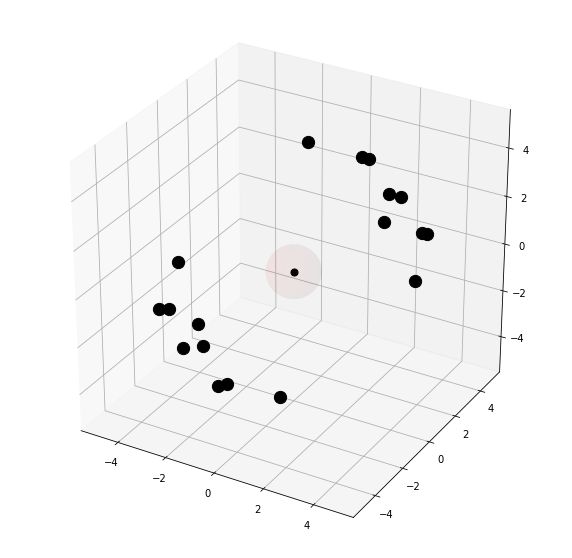

In [10]:
# coordinates of the electrons 
phi = (1+ np.sqrt(5))/2 

x1 = 0 
y1 = +1
z1 = +3*phi

x11 = 0 
y11 = -1
z11 = -3*phi

x2 = +1
y2 = +(2 + phi)
z2 = +2*phi

x22 = -1
y22 = -(2 + phi)
z22 = -2*phi

x3 = +phi
y3 = +2
z3 = +(2*phi +1)

x33 = -phi
y33 = -2
z33 = -(2*phi +1)  

# sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
#x = np.cos(u)*np.sin(v)*4*phi
#y = np.sin(u)*np.sin(v)*4*phi
#z = np.cos(v) *4*phi
x = np.cos(u)*np.sin(v) 
y = np.sin(u)*np.sin(v)
z = np.cos(v)

# Lets make the graphic
myfig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, color="r", alpha = 0.03)      # sphere   
ax.scatter([0], [0], [0], color="k", s=50)         # centro
ax.scatter([x1], [y1], [z1], color="k", s=150)            # electron 1
ax.scatter([x2], [y2], [z2], color="k", s=150)            # electron 2
ax.scatter([x3], [y3], [z3], color="k", s=150)            # electron 3
ax.scatter([x11], [y11], [z11], color="k", s=150)         # electron 4
ax.scatter([x22], [y22], [z22], color="k", s=150)         # electron 5
ax.scatter([x33], [y33], [z33], color="k", s=150)         # electron 6  

ax.scatter([z1], [x1], [y1], color="k", s=150)            # electron 7
ax.scatter([z2], [x2], [y2], color="k", s=150)            # electron 8
ax.scatter([z3], [x3], [y3], color="k", s=150)            # electron 9
ax.scatter([z11], [x11], [y11], color="k", s=150)         # electron 10
ax.scatter([z22], [x22], [y22], color="k", s=150)         # electron 11
ax.scatter([z33], [x33], [y33], color="k", s=150)         # electron 12 

ax.scatter([y1], [z1], [x1], color="k", s=150)            # electron 13
ax.scatter([y2], [z2], [x2], color="k", s=150)            # electron 14
ax.scatter([y3], [z3], [x3], color="k", s=150)            # electron 15
ax.scatter([y11], [z11], [x11], color="k", s=150)         # electron 16
ax.scatter([y22], [z22], [x22], color="k", s=150)         # electron 17
ax.scatter([y33], [z33], [x33], color="k", s=150)         # electron 18